### Apple Silicon TensorFlow 설치

- conda install -c apple tensorflow-deps
- pip install tensorflow-macos
- pip install tensorflow-metal



In [ ]:
%matplotlib inline

### 딥러닝

In [1]:
# 데이터 불러오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() # 저장 위치는 ~/.keras/datasets/

In [2]:
# 크기 확인
print(train_input.shape, train_target.shape) # 학습 데이터
print(test_input.shape, test_target.shape) # 테스트 데이터

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 이미지 확인

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
# 타겟 값 확인
print([train_target[i] for i in range(5)])

[9, 0, 0, 3, 0]


In [5]:
# 이미지 데이터 1차원 배열 변경

train_scaled = train_input / 255.0 # 픽셀 값의 범위 조정 - 수렴 속도를 높이고 안정적인 학습 ( 크기 범위가 너무 크면 기울기 소실과 기울기 폭발 문제 발생 가능성 높음 )
train_scaled = train_scaled.reshape(-1, 28*28)

In [7]:
# 데이터 나누기

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
# 크기 확인

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape) 

(48000, 784) (48000,)
(12000, 784) (12000,)


In [13]:
# Dense 레이어 정의 (층 생성)

from tensorflow import keras

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # 뉴런 개수, 뉴런 적용 활성화 함수, 입력의 크기

In [14]:
# sequential 모델 생성

model = keras.Sequential(dense)

In [15]:
# 모델 컴파일: 모델 학습하기 위해 필요한 설정 지정

# 이진 분류: loss = binary_crossentropy
# 다중 분류: loss = categorical_crossentropy

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [17]:
# 모델 학습

# python 3.9 버전으로 실행 시 메모리 초과 오류 발생 했음
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6069 - accuracy: 0.7928
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4785 - accuracy: 0.8385
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4567 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4458 - accuracy: 0.8526
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4368 - accuracy: 0.8555


In [18]:
# 모델 성능 평가

model.evaluate(X_val, y_val)

375/375 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.8498


[0.4456978440284729, 0.8498333096504211]

#### 심층 신경망

In [20]:
# 데이터 불러오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [21]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [22]:
# 방법 1

dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) # 일반적으로 출력층의 뉴런보다는 많게 설정 현재는 클래스 10개로 구성
dense2 = keras.layers.Dense(10, activation='softmax')

model = keras.Sequential([dense1, dense2])

model.summary() # output shape (배치 크기, 출력 뉴런 개수)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# 방법 2

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# 방법 3

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# 학습

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5622 - accuracy: 0.8094
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4068 - accuracy: 0.8535
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3723 - accuracy: 0.8658
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3500 - accuracy: 0.8755
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3334 - accuracy: 0.8805


In [27]:
# flatten 사용

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [30]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5796 - accuracy: 0.8005
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4850 - accuracy: 0.8342
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4703 - accuracy: 0.8393
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4639 - accuracy: 0.8403
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4632 - accuracy: 0.8416


In [31]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4620 - accuracy: 0.8459


[0.4619564116001129, 0.8459166884422302]

### 옵티마이저

- 모델의 손실 함수를 최소화 하기 위해 파라미터를 업데이트하는 알고리즘
- 케라스 경사 기본 경사하강법: RMSprop

In [32]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

# sgd = keras.optimizers.SGD()
# model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

### 신경망 모델 훈련


In [33]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [36]:
# 모델 생성

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [37]:
model = model_fn()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # history에 메서드 결과

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [42]:
history.history['loss'] 

[0.5866709351539612,
 0.4813474118709564,
 0.4677131772041321,
 0.45840543508529663,
 0.45916467905044556]

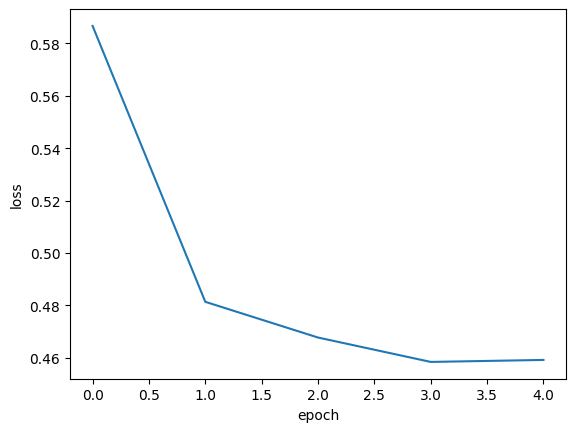

In [47]:
# history 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [48]:
# 검증 손실 계산

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

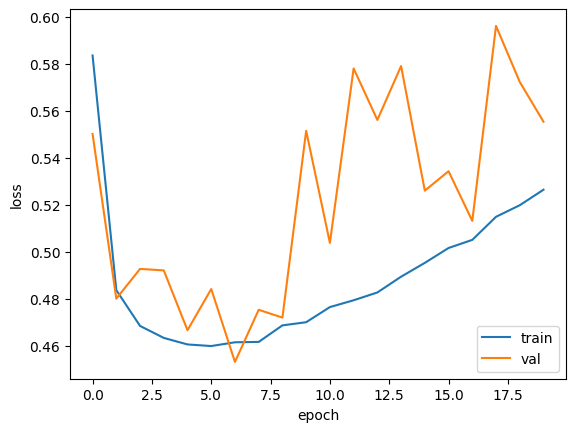

In [49]:
# history 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

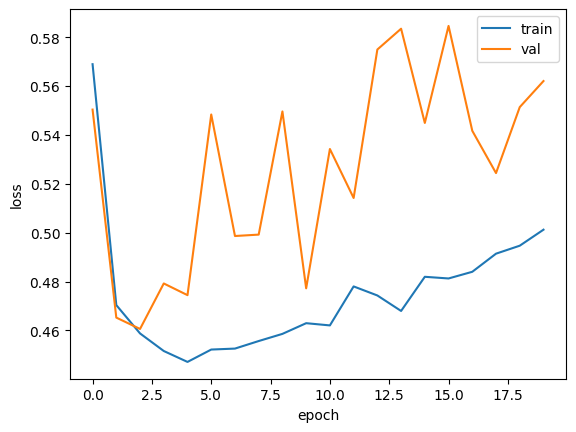

In [51]:
# 기본 옵티마이저 RMSprop 대신 Adam 사용해보기

model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 드롭아웃

- 일부 뉴런을 랜덤하게 꺼서 과대적합 방지

In [54]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


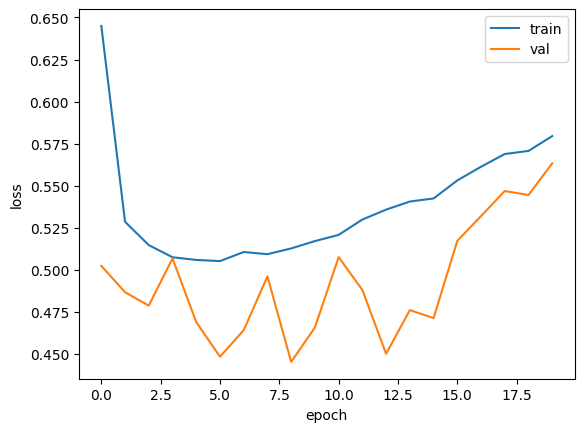

In [55]:
# 기본 옵티마이저 RMSprop 대신 Adam 사용해보기

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 모델 저장 복원

In [56]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [58]:
model.save_weights('model-weights.h5')# 모델의 가중치만 저장
model.save('model-whole.h5') # 모델 구조 + 가중치 + 옵티마이저 정보

In [59]:
# 훈련 하지 않은 새로운 모델에서 가중치 파라미터를 읽어서 사용

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5') # 저장했던 모델 구조와 정확히 같은 구조여야 함

# evaluate()를 사용하려면 compile() 메서드를 실행 한 후 가능 (손실 함수를 계산)

In [60]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1) #argmax: 가장 큰 값의 인덱스 반환 axis=-1: 마지막 차원을 따라 최댓값 선택
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 964us/step
0.82625


In [63]:
# 모델 전체 파일

model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 0.8263


[0.4899619221687317, 0.8262500166893005]

### 콜백

- 모델 학습하는 동안 특정 이벤트가 발생할 때 실행되는 사용자 정의 도구

In [64]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True) # ModelCheckpoint 콜백은 에포크 마다 모델을 저장 / save_best_only로 개선된 경우에만 모델을 저장 

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.8435


[0.4628951847553253, 0.843500018119812]

#### early stopping 조기 종료

In [66]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True) # patience 2번 연속 검증 점수 향상 않으면 훈련 중지, restore_best_weight: True - 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


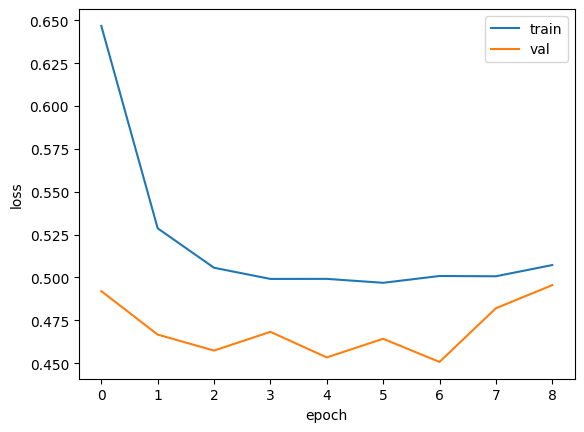

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()